## 3.5 A multiclass classification : Classifying newswires
last modified : 2021-3-22 by Imryoung Jeong

In [1]:
from IPython.display import Image

import keras
import numpy as np

#### 3.5.1 The Reuters dataset

In [3]:
# Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 1s 0us/step


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(len(train_data))
print(len(test_data))

# A label associated with an example is an integer b/w 0 and 45 : a topic index
print(train_data[0])

#### 3.5.2 Preparing the data : One-hot encoding

In [6]:
def vectorize_sequences(sequences, dimension = 10000):
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
""""
def to_one_hot(labels, dimension = 46) :
    
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels) :
        results[i, label] = 1
        
    return results
    
# label ranges from 0 to 45 : dim = 46
# e.g. label = 34 : 34th component = 1, others = 0

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
""""

In [16]:
# or just use package from Keras ...
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### 3.5.3 Building the network

> <ul>
    <li>In a stack of <code>Dense</code> layers, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers. (pp.79-80)</li> <br>
> <li>...because the final outputs are 46-dimentional, you should avoid intermediate layers with fewer than 46 hidden units. (pp.83)</li>

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

> <code>softmax</code> activation means that the network will output a <b>probability distribution</b> over the 46 different output classes; for every input sample, the network will produce a 46-dim output vector, where <code>output[i]</code> is the probability that the sample belongs to class <code>i</code>. (pp.80)

In [19]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

#### 3.5.4 Validating your approach

In [20]:
# Create a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 3.1935 - accuracy: 0.3900 - val_loss: 1.7243 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4969 - accuracy: 0.7030 - val_loss: 1.2882 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0751 - accuracy: 0.7755 - val_loss: 1.1231 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8533 - accuracy: 0.8256 - val_loss: 1.0296 - val_accuracy: 0.7980
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6726 - accuracy: 0.8666 - val_loss: 0.9735 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5142 - accuracy: 0.9004 - val_loss: 0.9485 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4151 - accuracy: 0.9150 - val_loss: 0.9335 - val_accuracy: 0.7960
Epoch 8/20
16

In [22]:
import matplotlib.pyplot as plt

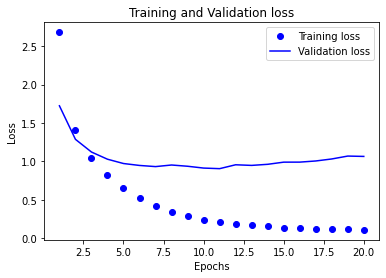

In [23]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

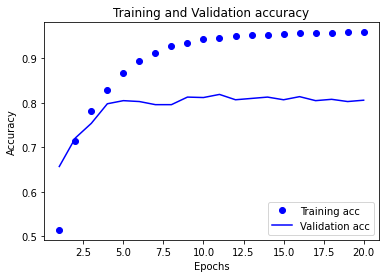

In [24]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# Retraining

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Epoch 1/9
16/16 [==============================] - 0s 19ms/step - loss: 0.0865 - accuracy: 0.9585 - val_loss: 1.2927 - val_accuracy: 0.7940
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0868 - accuracy: 0.9572 - val_loss: 1.2803 - val_accuracy: 0.7960
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 0.0894 - accuracy: 0.9583 - val_loss: 1.2878 - val_accuracy: 0.7940
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0860 - accuracy: 0.9582 - val_loss: 1.3029 - val_accuracy: 0.7970
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.0834 - accuracy: 0.9609 - val_loss: 1.3606 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0857 - accuracy: 0.9588 - val_loss: 1.3573 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0839 - accuracy: 0.9597 - val_loss: 1.3685 - val_accuracy: 0.7800
Epoch 8/9
16/16 [===

#### 3.5.5 Generating predictions on new data

In [28]:
predictions = model.predict(x_test)
print(predictions)

[[4.5891903e-07 1.7431596e-07 4.2083286e-08 ... 1.2270520e-09
  6.0901677e-15 1.3741204e-09]
 [6.8272602e-05 4.9979981e-02 8.1595313e-03 ... 1.5151949e-08
  2.8283696e-13 1.7928048e-09]
 [7.7470983e-03 9.2471129e-01 1.6375874e-04 ... 9.0700727e-05
  3.6957854e-07 2.4783051e-09]
 ...
 [2.5745300e-07 5.5561236e-07 5.6192047e-09 ... 2.7753169e-09
  9.1994683e-14 3.2011891e-09]
 [2.2408192e-03 1.5911315e-01 2.0631021e-04 ... 3.6349763e-06
  6.8786230e-09 8.2561542e-08]
 [7.6015000e-05 9.5102078e-01 4.7279135e-04 ... 1.7034127e-08
  1.3772986e-09 1.9856518e-10]]


### Wrapping up
---
<ul>
    <li>In a single-label, multiclass classification problem, your network should end with a <code>softmax</code> activation so that it will output a probability distribution over the N output classes</li><br>
    <li><b>Categorical crossentropy</b> is almost always the loss function you should use: it minimizes the distance between the probability distribution output by the network and the true distribution of the targets</li><br>
    <li>Two ways to handle labels in multiclass classification:
        <ol>
            <li>Use categorical encoding(one-hot encoding) and use <code>categorical_crossentropy</code> as a loss function</li>
            <li>Encode the labels as integers and use <code>sparse_categorical_crossentropy</code> as a loss function</li>
        </ol><br>
    <li>You should avoid creating information bottlenecks in your network due to indermediate layers that are to small</li>
    </ul>
    